![microsoft_logo](images/micro_logo.jpg)

# Microsoft Movie Studio Analysis

**Authors:** Scott Graham
***

## Overview

The goal of this analysis is to provide an insight for [Microsoft](https://www.microsoft.com/en-au/movies-and-tv?activetab=movies%3aprimaryr2) regarding the latest box office films and what is popular and most successful so they can leverage this information to provide quality content in their new movie studio. Detailed analysis of what is "hot or not" will ensure that resources are spent developing content that will be widely accepted and best return on investment for Microsoft.

![imdb_logo](images/IMDB_logo.jpg)

## Business Problem

Microsoft need to provide movie content that is relevant with current trends, to ensure that their resource allocation is directed in the right direction to provide the best results. Using multiple databases from [IMDB](https://www.imdb.com/) to gain insights from the reviews of fans and critics to provide the best information about what is trending with Microsoft's intended audience. Supplemented with the current gross revenue information provided by [Box Office Mojo](https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/) from 2010 to 2018.

Understanding what movies have made the highest gross at the box office worldwide, have the highest rating amongst fans and critics alike and the most popular genres from a profitability and review standpoint will provide Microsoft with the insight to direct resources to creating the best content possible.

![bom_logo](images/bom_logo.png)

## Data Understanding

[IMDB](https://www.imdb.com/) is one of the largest database for information relating to movies and TV series that includes information about the cast, crew, plot summaries, rating and reviews both critcal and fan-based.
Each review has a unique ID associated to the movie details and the ratings. The data files provides information on the studio that created the movie, the running time, the year it was released and genre.

[Box Office Mojo](https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/) provides the lifetime highest gross movies and this dataset has been restricted from 2010 to present. This information will be useful to find the top grossing movies and insights we can make from why they are the top gross movies.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
bom_gross = pd.read_csv('data/bom.movie_gross.csv.gz')
imdb_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')

In [3]:
# Finding out general info about each of the imported datasets
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### BOM Gross Data
General information relevant to the BOM Gross data and any basic modifications to make the data more useful.

In [6]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
#Convert foreign gross to float to match domestic gross
bom_gross['foreign_gross'] = pd.to_numeric(bom_gross['foreign_gross'], errors='coerce')
#If we want to change NaN values to 0:
bom_gross = bom_gross.replace(np.nan, 0, regex=True)
print(bom_gross.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object


In [9]:
#Checking that all titles are unique
bom_gross.duplicated('title').value_counts()

False    3386
True        1
dtype: int64

In [10]:
#Determine what was the repeat
bom_gross['title'].describe()

count          3387
unique         3386
top       Bluebeard
freq              2
Name: title, dtype: object

In [11]:
# Need to remove the repeat title in bom_gross 'Bluebeard'
bom_gross['title'] = bom_gross['title'].drop_duplicates()
bom_gross['title'].describe()

count            3386
unique           3386
top       Toy Story 3
freq                1
Name: title, dtype: object

### IMDB Basics Data
General information relevant to the IMDB Basics data

In [12]:
imdb_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [13]:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [14]:
# To check that the numbers are all rows are unique
imdb_basics.duplicated('tconst').value_counts()

False    146144
dtype: int64

In [15]:
#Rename tconst to reviewid
imdb_basics.rename(columns={'tconst':'reviewid'}, inplace=True)
imdb_basics.head()

,reviewid,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
# Checking for repeats
imdb_basics.duplicated('primary_title').value_counts()

False    136071
True      10073
dtype: int64

In [17]:
#Checking for repeats
imdb_basics.duplicated('original_title').value_counts()

False    137774
True       8370
dtype: int64

In [18]:
#Checking the frequency of each genre.
imdb_basics['genres'].value_counts()
#Result of this shows that I need to seperate values when multiple genres are grouped together

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1085, dtype: int64

### IMDB Ratings Data
General information relevant to the IMDB Ratings data

In [19]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [20]:
# To test that all rows are unique
imdb_ratings.duplicated('tconst').value_counts()

False    73856
dtype: int64

In [21]:
#Rename tconst to reviewid
imdb_ratings.rename(columns={'tconst':'reviewid'}, inplace=True)
imdb_ratings.head()

,reviewid,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

## Data Cleaning   

In [22]:
#Removing symbols from primary title name
imdb_basics['primary_title'] = imdb_basics['primary_title'].str.replace("[!,#]", "")

C:\Users\scott\AppData\Local\Temp/ipykernel_19232/2378905604.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  imdb_basics['primary_title'] = imdb_basics['primary_title'].str.replace("[!,#]", "")


In [23]:
imdb_basics.sort_values('primary_title').head(10)

,reviewid,primary_title,original_title,start_year,runtime_minutes,genres
88974,tt5144238,$2 a Day,$2 a Day,2015,52.0,Documentary
28591,tt2106284,$50K and a Call Girl: A Love Story,$50K and a Call Girl: A Love Story,2014,90.0,"Action,Adventure,Comedy"
140532,tt9118844,$MOKE,$MOKE,2019,NaN,NaN
70067,tt4004608,$elfie Shootout,$elfie Shootout,2016,86.0,Comedy
33792,tt2258233,$ellebrity,$ellebrity,2012,89.0,Documentary
76834,tt4397606,$kumbagz,$kumbagz,2015,71.0,"Crime,Thriller"
39648,tt2410904,$tiffed or How I Learned to Deal with Dissapoi...,$tiffed or How I Learned to Deal with Dissapoi...,2012,51.0,Comedy
112668,tt6608094,&,&,2017,NaN,NaN
121005,tt7288662,& Jara Hatke,& Jara Hatke,2016,110.0,"Drama,Family,Romance"
36537,tt2332503,&Me,&Me,2013,88.0,Romance


In [24]:
#Remove unnecessary columns
imdb_basics.drop(columns = 'original_title', inplace = True)
imdb_basics.head()

,reviewid,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [25]:
#Add a new column that has the total gross
bom_gross['total_gross'] = bom_gross['domestic_gross'] + bom_gross['foreign_gross']
bom_gross.head()
#can pass a parameter to display it just as numbers using pandas

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [26]:
bom_gross['total_gross'] = pd.to_numeric(bom_gross['total_gross'], errors='coerce')
#If we want to change NaN values to 0:
bom_gross = bom_gross.replace(np.nan, 0, regex=True)
print(bom_gross.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
total_gross       float64
dtype: object


In [27]:
# Removing decimal places from the gross values
bom_gross['total_gross'] = bom_gross['total_gross'].map(lambda x: '%.0f' % x)
bom_gross['domestic_gross'] = bom_gross['domestic_gross'].map(lambda x: '%.0f' % x)
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].map(lambda x: '%.0f' % x)
bom_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200,0,2018,6200
3383,Edward II (2018 re-release),FM,4800,0,2018,4800
3384,El Pacto,Sony,2500,0,2018,2500
3385,The Swan,Synergetic,2400,0,2018,2400


## Merging Datasets
Merging the IMDB datasets for easy comparison of the values.

In [28]:
imdb_comb = pd.merge(imdb_basics, imdb_ratings, how = 'inner')
imdb_comb.rename(columns={'primary_title':'title'}, inplace=True)
imdb_comb.sort_values('title')

,reviewid,title,start_year,runtime_minutes,genres,averagerating,numvotes
17401,tt2106284,$50K and a Call Girl: A Love Story,2014,90.0,"Action,Adventure,Comedy",6.8,1818
41912,tt4004608,$elfie Shootout,2016,86.0,Comedy,3.5,101
20738,tt2258233,$ellebrity,2012,89.0,Documentary,5.5,1001
45518,tt4397606,$kumbagz,2015,71.0,"Crime,Thriller",6.4,16
66086,tt7288662,& Jara Hatke,2016,110.0,"Drama,Family,Romance",6.5,13
...,...,...,...,...,...,...,...
71004,tt8514766,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.0,"Comedy,Horror,Thriller",4.8,51
45685,tt4422510,Üç Iki Bir... Kestik,2014,92.0,Comedy,4.3,88
52301,tt5217114,à propos: philosophie,2016,80.0,Documentary,8.2,5
36816,tt3509772,ärtico,2014,78.0,Drama,6.6,101


In [29]:
# Checking how many no values there are in the data
imdb_comb.isna().sum()

reviewid              0
title                 0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [30]:
# Combining the previously combined IMDB table with BOM gross. Using title as the key between both
total_comb = pd.merge(bom_gross, imdb_comb, how = 'inner')
total_comb.sort_values('total_gross')

,title,studio,domestic_gross,foreign_gross,year,total_gross,reviewid,start_year,runtime_minutes,genres,averagerating,numvotes
1255,Storage 24,Magn.,100,0,2013,100,tt1986953,2012,87.0,"Action,Horror,Mystery",4.4,6229
925,Starry Starry Night,CL,10000,0,2012,10000,tt2084098,2011,99.0,Drama,6.9,1057
889,V/H/S,Magn.,100000,0,2012,100000,tt2105044,2012,116.0,"Horror,Thriller",5.8,53034
2317,Our Last Tango,Strand,100000,0,2016,100000,tt4937156,2015,85.0,"Documentary,Musical",7.2,537
1540,The Best Offer,IFC,100000,0,2014,100000,tt1924396,2013,131.0,"Crime,Drama,Mystery",7.8,96073
...,...,...,...,...,...,...,...,...,...,...,...,...
1007,Instructions Not Included,LGF,44500000,54600000,2013,99100000,tt2378281,2013,115.0,"Comedy,Drama",7.6,26866
647,The Lucky One,WB,60500000,38900000,2012,99400000,tt1327194,2012,101.0,"Drama,Romance",6.5,94359
2669,Munna Michael,Eros,99600,0,2017,99600,tt6117702,2017,140.0,"Action,Drama,Music",3.4,2295
232,White Lion,Scre.,0,99600,2010,99600,tt1618421,2010,88.0,"Drama,Family",6.7,828


In [31]:
#Want to remove duplicates so that we can just view gross values for single titles
total_comb = total_comb.drop_duplicates('title')
total_comb

,title,studio,domestic_gross,foreign_gross,year,total_gross,reviewid,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000,652000000,2010,1067000000,tt0435761,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000,535700000,2010,828300000,tt1375666,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000,513900000,2010,752600000,tt0892791,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000,398000000,2010,698500000,tt1325004,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000,311500000,2010,623900000,tt1228705,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...
2984,Let Yourself Go,Men.,12200,0,2018,12200,tt4932388,2017,99.0,Comedy,6.1,749
2985,Souvenir,Strand,11400,0,2018,11400,tt2387692,2016,90.0,"Drama,Music,Romance",6.0,823
2987,Beauty and the Dogs,Osci.,8900,0,2018,8900,tt6776572,2017,100.0,"Crime,Drama,Thriller",7.0,1016
2988,The Quake,Magn.,6200,0,2018,6200,tt6523720,2018,106.0,"Action,Drama,Thriller",6.2,5270


In [32]:
# Remove unnecessary columns
total_comb.drop(columns = ['start_year','foreign_gross','domestic_gross','reviewid'], inplace = True)

In [33]:
# Remove values of tot gross have NaN values
total_comb = total_comb.dropna()
total_comb

,title,studio,year,total_gross,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,2010,1067000000,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,2010,828300000,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,2010,752600000,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,2010,698500000,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,2010,623900000,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...
2984,Let Yourself Go,Men.,2018,12200,99.0,Comedy,6.1,749
2985,Souvenir,Strand,2018,11400,90.0,"Drama,Music,Romance",6.0,823
2987,Beauty and the Dogs,Osci.,2018,8900,100.0,"Crime,Drama,Thriller",7.0,1016
2988,The Quake,Magn.,2018,6200,106.0,"Action,Drama,Thriller",6.2,5270


In [34]:
# Check that all NaN values are removed
total_comb.isna().sum()

title              0
studio             0
year               0
total_gross        0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [35]:
# Check the Dtype of the table
total_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543 entries, 0 to 2989
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2543 non-null   object 
 1   studio           2543 non-null   object 
 2   year             2543 non-null   int64  
 3   total_gross      2543 non-null   object 
 4   runtime_minutes  2543 non-null   float64
 5   genres           2543 non-null   object 
 6   averagerating    2543 non-null   float64
 7   numvotes         2543 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 178.8+ KB


In [36]:
# Change Dtype of total_gross to integer
total_comb['total_gross'] = pd.to_numeric(total_comb['total_gross'], errors='coerce')
#If we want to change NaN values to 0:
total_comb = total_comb.replace(np.nan, 0, regex=True)
print(total_comb.dtypes)

title               object
studio              object
year                 int64
total_gross          int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object


C:\Users\scott\AppData\Local\Temp/ipykernel_19232/2331009247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_comb['total_gross'] = pd.to_numeric(total_comb['total_gross'], errors='coerce')


In [37]:
# Split apart the genres for their own individual column. Seperated by the ','
total_comb[['primary_genre', 'sub_genre', 'other_genre']] = total_comb['genres'].str.split(',', expand=True)
total_comb

,title,studio,year,total_gross,runtime_minutes,genres,averagerating,numvotes,primary_genre,sub_genre,other_genre
0,Toy Story 3,BV,2010,1067000000,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy
1,Inception,WB,2010,828300000,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi
2,Shrek Forever After,P/DW,2010,752600000,93.0,"Adventure,Animation,Comedy",6.3,167532,Adventure,Animation,Comedy
3,The Twilight Saga: Eclipse,Sum.,2010,698500000,124.0,"Adventure,Drama,Fantasy",5.0,211733,Adventure,Drama,Fantasy
4,Iron Man 2,Par.,2010,623900000,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...
2984,Let Yourself Go,Men.,2018,12200,99.0,Comedy,6.1,749,Comedy,None,None
2985,Souvenir,Strand,2018,11400,90.0,"Drama,Music,Romance",6.0,823,Drama,Music,Romance
2987,Beauty and the Dogs,Osci.,2018,8900,100.0,"Crime,Drama,Thriller",7.0,1016,Crime,Drama,Thriller
2988,The Quake,Magn.,2018,6200,106.0,"Action,Drama,Thriller",6.2,5270,Action,Drama,Thriller


In [38]:
# Remove unnecessary columns
total_comb.drop(columns = ['genres'], inplace = True)
total_comb

,title,studio,year,total_gross,runtime_minutes,averagerating,numvotes,primary_genre,sub_genre,other_genre
0,Toy Story 3,BV,2010,1067000000,103.0,8.3,682218,Adventure,Animation,Comedy
1,Inception,WB,2010,828300000,148.0,8.8,1841066,Action,Adventure,Sci-Fi
2,Shrek Forever After,P/DW,2010,752600000,93.0,6.3,167532,Adventure,Animation,Comedy
3,The Twilight Saga: Eclipse,Sum.,2010,698500000,124.0,5.0,211733,Adventure,Drama,Fantasy
4,Iron Man 2,Par.,2010,623900000,124.0,7.0,657690,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...
2984,Let Yourself Go,Men.,2018,12200,99.0,6.1,749,Comedy,None,None
2985,Souvenir,Strand,2018,11400,90.0,6.0,823,Drama,Music,Romance
2987,Beauty and the Dogs,Osci.,2018,8900,100.0,7.0,1016,Crime,Drama,Thriller
2988,The Quake,Magn.,2018,6200,106.0,6.2,5270,Action,Drama,Thriller


In [39]:
# Remove rows that have gross less than the mean AND less number of votes less than the mean
total_comb = total_comb.loc[~((total_comb['total_gross'] < total_comb['total_gross'].mean()) |
                                  (total_comb['numvotes'] < total_comb['numvotes'].mean()))]
total_comb

,title,studio,year,total_gross,runtime_minutes,averagerating,numvotes,primary_genre,sub_genre,other_genre
0,Toy Story 3,BV,2010,1067000000,103.0,8.3,682218,Adventure,Animation,Comedy
1,Inception,WB,2010,828300000,148.0,8.8,1841066,Action,Adventure,Sci-Fi
2,Shrek Forever After,P/DW,2010,752600000,93.0,6.3,167532,Adventure,Animation,Comedy
3,The Twilight Saga: Eclipse,Sum.,2010,698500000,124.0,5.0,211733,Adventure,Drama,Fantasy
4,Iron Man 2,Par.,2010,623900000,124.0,7.0,657690,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...
2766,First Man,Uni.,2018,105700000,141.0,7.4,120009,Biography,Drama,History
2771,A Simple Favor,LGF,2018,97600000,117.0,6.9,83338,Comedy,Crime,Drama
2772,The Favourite,FoxS,2018,96000000,119.0,7.6,116011,Biography,Drama,History
2781,BlacKkKlansman,Focus,2018,93300000,135.0,7.5,149005,Biography,Crime,Drama


In [40]:
#save data to new csv file
imdb_comb.to_csv('./data/cleaned_imdb_comb.csv')
total_comb.to_csv('./data/cleaned_total_comb.csv')

## Data Modeling
The data will be modelled to identify correlations between data that can be used to satisfy the key objectives.




***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [41]:
total_comb.sort_values('averagerating', ascending=False)

,title,studio,year,total_gross,runtime_minutes,averagerating,numvotes,primary_genre,sub_genre,other_genre
1,Inception,WB,2010,828300000,148.0,8.8,1841066,Action,Adventure,Sci-Fi
1265,Interstellar,Par.,2014,677400000,169.0,8.6,1299334,Adventure,Drama,Sci-Fi
2036,Dangal,UTV,2016,302900000,161.0,8.5,123638,Action,Biography,Drama
2719,Avengers: Infinity War,BV,2018,678800000,149.0,8.5,670926,Action,Adventure,Sci-Fi
598,Django Unchained,Wein.,2012,425400000,165.0,8.4,1211405,Drama,Western,None
...,...,...,...,...,...,...,...,...,...,...
634,Ghost Rider: Spirit of Vengeance,Sony,2012,132600000,96.0,4.3,103608,Action,Fantasy,Thriller
18,The Last Airbender,Par.,2010,319700000,103.0,4.1,137734,Action,Adventure,Family
1611,Fifty Shades of Grey,Uni.,2015,571000000,125.0,4.1,279126,Drama,Romance,Thriller
291,Jack and Jill,Sony,2011,149700000,91.0,3.3,71361,Comedy,None,None


In [42]:
total_comb['total_gross'].describe()

count    4.490000e+02
mean     3.398515e+08
std      2.780559e+08
min      8.110000e+07
25%      1.368000e+08
50%      2.299000e+08
75%      4.634000e+08
max      1.405400e+09
Name: total_gross, dtype: float64

In [43]:
total_comb['numvotes'].describe()

count    4.490000e+02
mean     2.638745e+05
std      2.109195e+05
min      7.019300e+04
25%      1.188620e+05
50%      1.958890e+05
75%      3.467470e+05
max      1.841066e+06
Name: numvotes, dtype: float64

In [44]:
total_comb['primary_genre'].value_counts()

Action         223
Comedy          62
Adventure       61
Drama           36
Biography       32
Horror          13
Crime           10
Animation        6
Mystery          3
Romance          1
Documentary      1
Fantasy          1
Name: primary_genre, dtype: int64

In [45]:
genre_comb = total_comb[['primary_genre', 'sub_genre', 'other_genre']].apply(pd.Series.value_counts)
genre_comb = genre_comb.replace(np.nan, 0, regex=True)
genre_comb['genre_total'] = genre_comb.sum(axis = 1)

In [46]:
# Remove decimals
genre_comb['primary_genre'] = genre_comb['primary_genre'].map(lambda x: '%.0f' % x)
genre_comb['sub_genre'] = genre_comb['sub_genre'].map(lambda x: '%.0f' % x)
genre_comb['other_genre'] = genre_comb['other_genre'].map(lambda x: '%.0f' % x)
genre_comb['genre_total'] = genre_comb['genre_total'].map(lambda x: '%.0f' % x)

In [47]:
# Converting dtype to integer
genre_comb = genre_comb.astype({'primary_genre': 'int64',
                                'sub_genre': 'int64',
                                'other_genre': 'int64',
                                'genre_total': 'int64'})

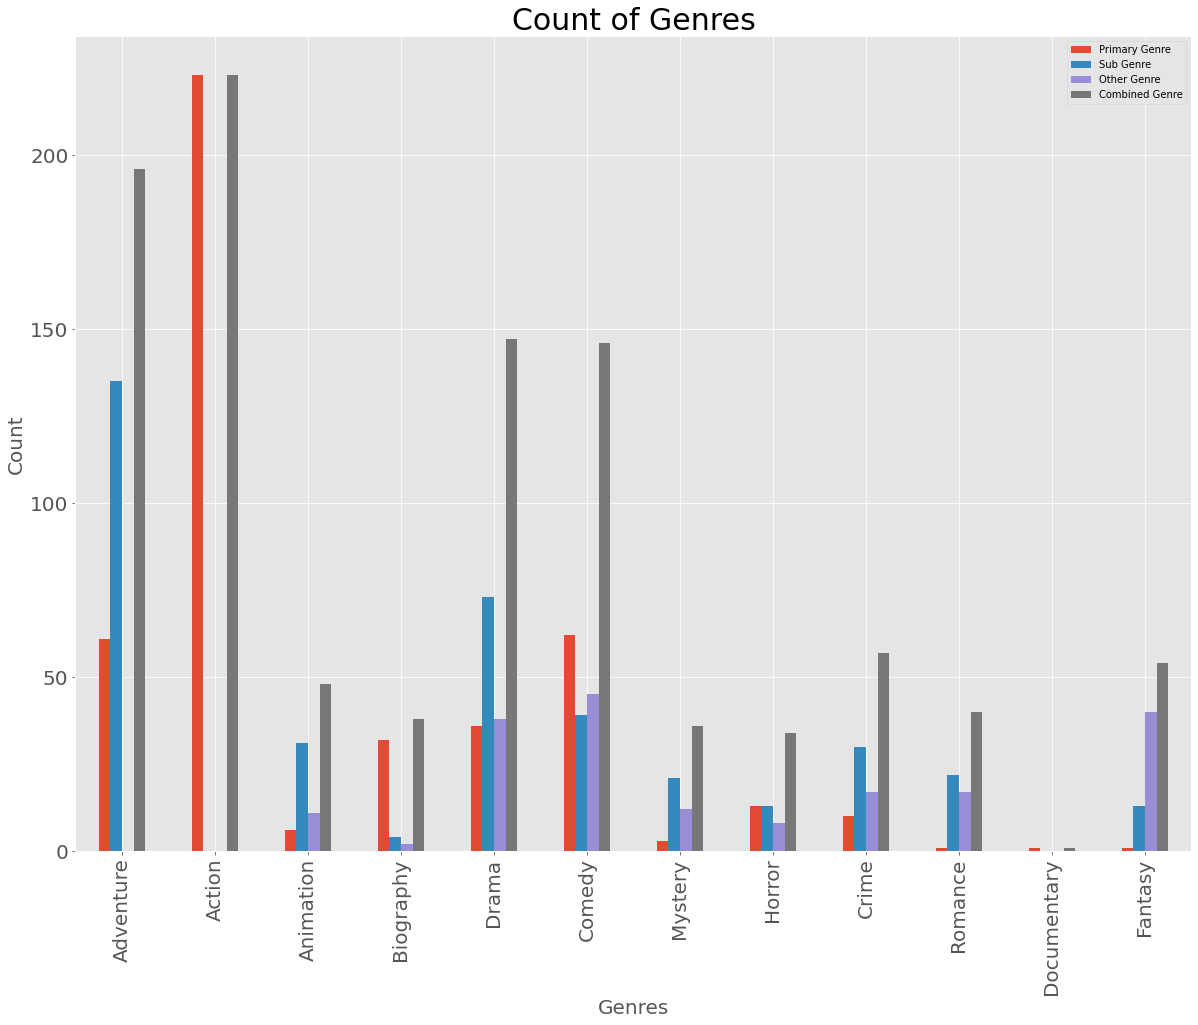

In [91]:
pg = genre_comb['primary_genre']
sg = genre_comb['sub_genre']
og = genre_comb['other_genre']
tg = genre_comb['genre_total']
index = total_comb['primary_genre'].unique()
df = pd.DataFrame({'Primary Genre': pg, 'Sub Genre': sg, 'Other Genre': og, 'Combined Genre': tg}, index=index)
ax = df.plot.bar(figsize = (20,15),
                 fontsize = 20)
plt.xlabel('Genres', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Count of Genres', fontsize = 30)
plt.savefig('images/count_of_genres.png', bbox_inches = 'tight')

In [50]:
# Plot a graph that shows average rating vs genre
# Will likely need to write some code first to get mean of each genre
avg_genre = total_comb.groupby('primary_genre')['averagerating'].mean()
avg_genre

primary_genre
Action         6.703587
Adventure      6.862295
Animation      7.333333
Biography      7.612500
Comedy         6.401613
Crime          7.440000
Documentary    1.600000
Drama          6.925000
Fantasy        5.500000
Horror         6.430769
Mystery        7.500000
Romance        7.100000
Name: averagerating, dtype: float64

In [53]:
top_10_gross = total_comb.sort_values('total_gross', ascending=False).head(10)
top_10_gross

,title,studio,year,total_gross,runtime_minutes,averagerating,numvotes,primary_genre,sub_genre,other_genre
1601,Avengers: Age of Ultron,BV,2015,1405400000,141.0,7.3,665594,Action,Adventure,Sci-Fi
2720,Black Panther,BV,2018,1347000000,134.0,7.3,516148,Action,Adventure,Sci-Fi
2408,Star Wars: The Last Jedi,BV,2017,1332600000,152.0,7.1,462903,Action,Adventure,Fantasy
2721,Jurassic World: Fallen Kingdom,Uni.,2018,1309500000,128.0,6.2,219125,Action,Adventure,Sci-Fi
2722,Incredibles 2,BV,2018,1242800000,118.0,7.7,203510,Action,Adventure,Animation
942,Iron Man 3,BV,2013,1214800000,130.0,7.2,692794,Action,Adventure,Sci-Fi
1602,Minions,Uni.,2015,1159400000,91.0,6.4,193917,Adventure,Animation,Comedy
2011,Captain America: Civil War,BV,2016,1153300000,147.0,7.8,583507,Action,Adventure,Sci-Fi
2723,Aquaman,WB,2018,1147800000,143.0,7.1,263328,Action,Adventure,Fantasy
240,Transformers: Dark of the Moon,P/DW,2011,1123800000,154.0,6.2,366409,Action,Adventure,Sci-Fi


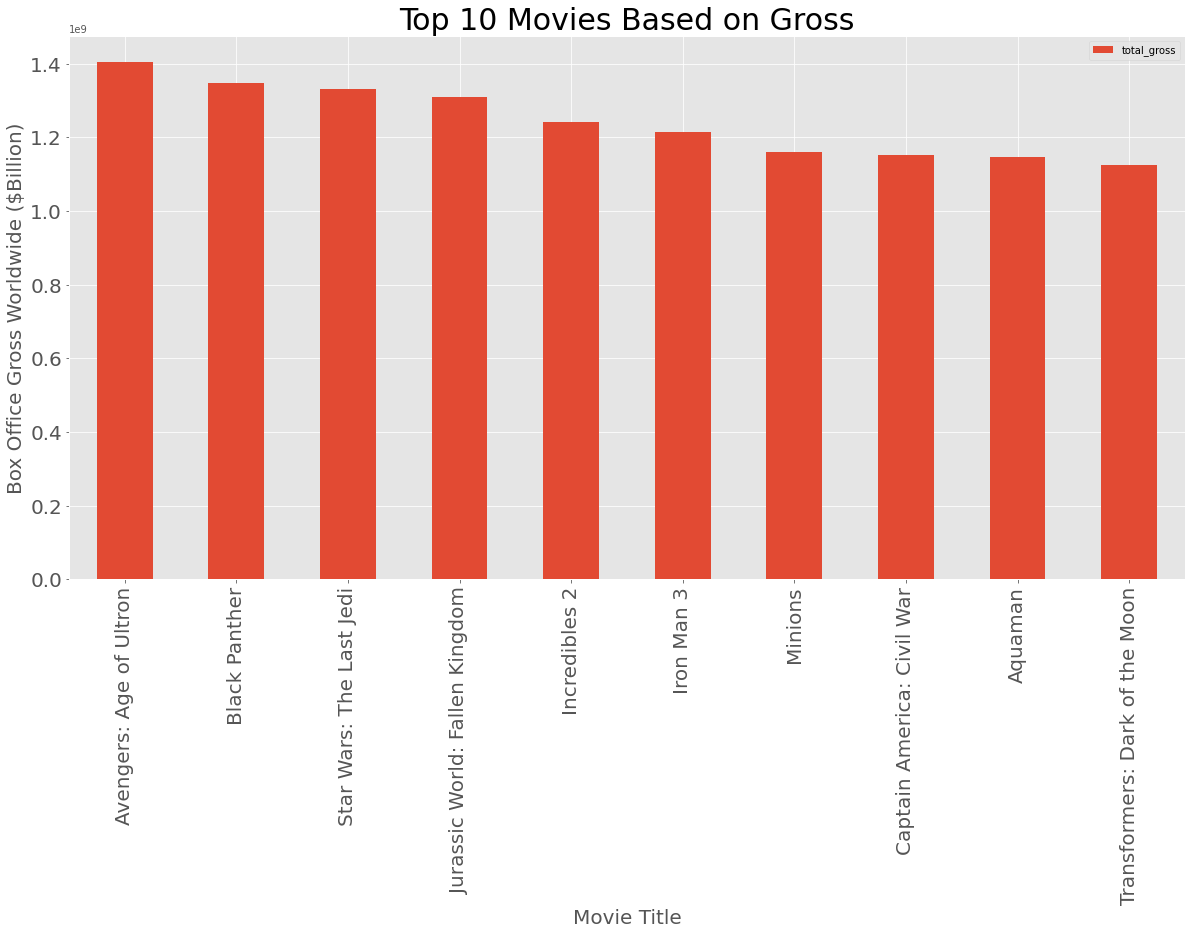

In [90]:
plt.style.use('ggplot')
top_10_gross.plot(x='title',
            y='total_gross',
            figsize = (20,10),
            kind='bar',
            fontsize = 20)
plt.xlabel('Movie Title', fontsize = 20)
plt.ylabel('Box Office Gross Worldwide ($Billion)', fontsize = 20)
plt.title('Top 10 Movies Based on Gross', fontsize = 30)
plt.savefig('images/top_10_gross.jpg', bbox_inches = 'tight')

In [55]:
total_comb.sort_values('numvotes', ascending = False)

,title,studio,year,total_gross,runtime_minutes,averagerating,numvotes,primary_genre,sub_genre,other_genre
1,Inception,WB,2010,828300000,148.0,8.8,1841066,Action,Adventure,Sci-Fi
588,The Dark Knight Rises,WB,2012,1084900000,164.0,8.4,1387769,Action,Thriller,None
1265,Interstellar,Par.,2014,677400000,169.0,8.6,1299334,Adventure,Drama,Sci-Fi
598,Django Unchained,Wein.,2012,425400000,165.0,8.4,1211405,Drama,Western,None
956,The Wolf of Wall Street,Par.,2013,392000000,180.0,8.2,1035358,Biography,Crime,Drama
...,...,...,...,...,...,...,...,...,...,...
2751,Creed II,MGM,2018,214000000,130.0,7.2,72503,Drama,Sport,None
1269,Rio 2,Fox,2014,500100000,101.0,6.3,72209,Adventure,Animation,Comedy
291,Jack and Jill,Sony,2011,149700000,91.0,3.3,71361,Comedy,None,None
69,Burlesque,SGem,2010,89500000,119.0,6.4,71021,Drama,Music,Musical


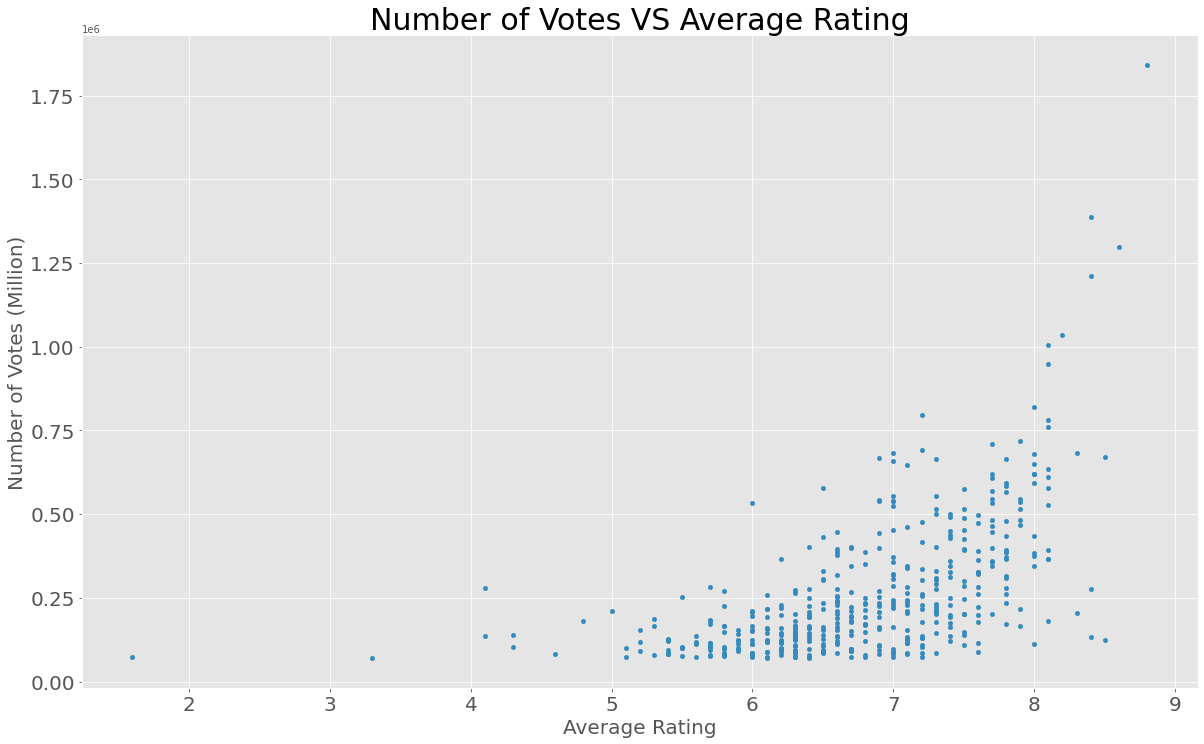

In [92]:
# Check for correlation between number of movies in that genre vs the total gross
total_comb.plot(x = 'averagerating',
                y = 'numvotes',
                kind = 'scatter',
                figsize = (20,12),
                fontsize = 20)
plt.xlabel('Average Rating', fontsize = 20)
plt.ylabel('Number of Votes (Million)', fontsize = 20)
plt.title('Number of Votes VS Average Rating', fontsize = 30)
plt.savefig('images/votes_vs_rating.jpg', bbox_inches = 'tight')

<AxesSubplot:title={'center':'Number of Votes VS Total Gross at Box Office'}, xlabel='Total Gross at Box Office ($Billion)', ylabel='Number of Votes (Million)'>

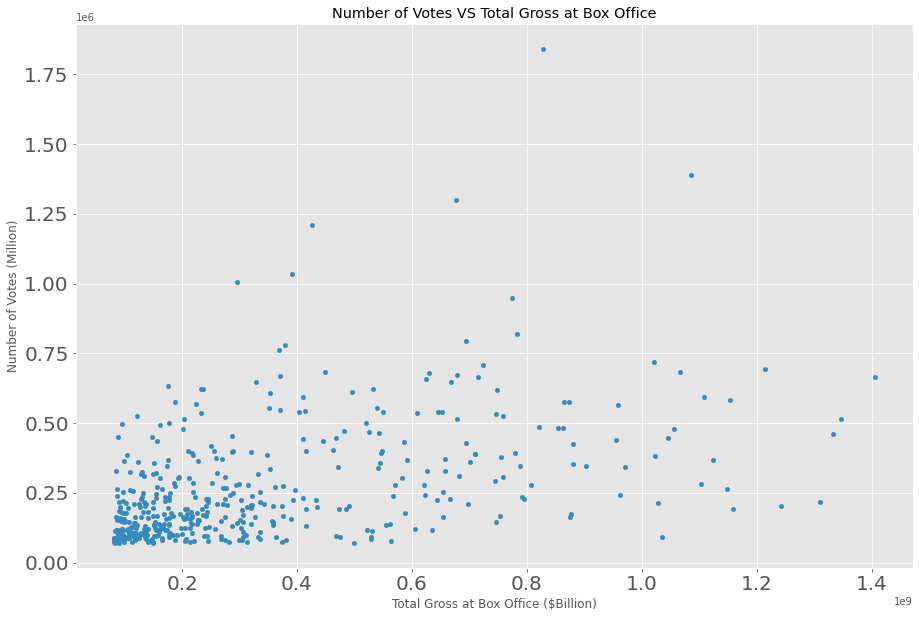

In [57]:
# Now to compare numvotes vs total gross
total_comb.plot(x = 'total_gross',
                y = 'numvotes',
                kind = 'scatter',
                figsize = (15,10),
                fontsize = 20,
                title = "Number of Votes VS Total Gross at Box Office",
                xlabel = 'Total Gross at Box Office ($Billion)',
                ylabel = 'Number of Votes (Million)')

<AxesSubplot:title={'center':'Average Rating VS Run Time Minutes'}, xlabel='Average Rating', ylabel='Run Time Minutes'>

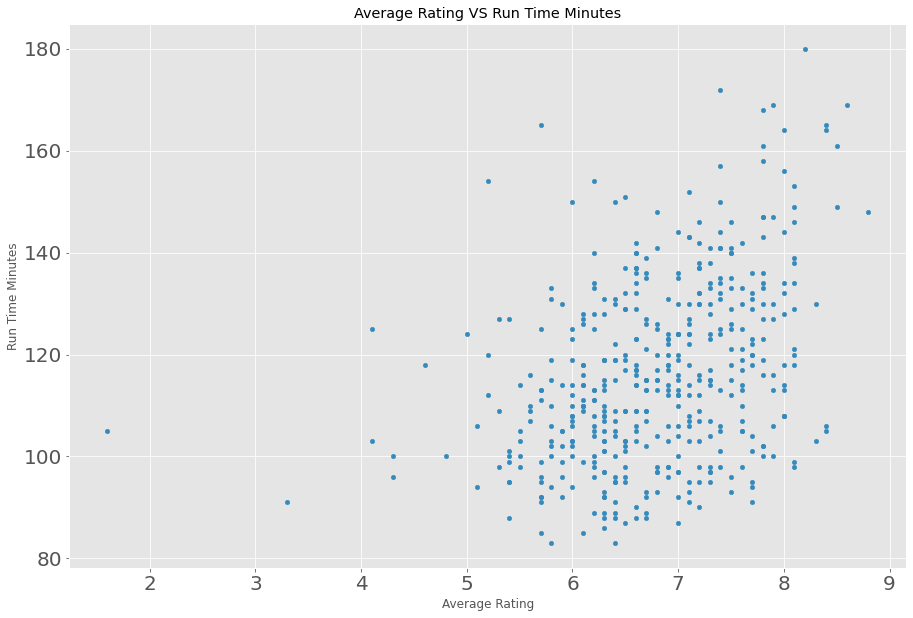

In [58]:
# Now to compare average rating vs runtime minutes
total_comb.plot(x = 'averagerating',
                y = 'runtime_minutes',
                kind = 'scatter',
                figsize = (15,10),
                fontsize = 20,
                title = "Average Rating VS Run Time Minutes",
                xlabel = 'Average Rating',
                ylabel = 'Run Time Minutes')

In [60]:
# Getting the mean total gross for each of the studios
studio_gross = total_comb.groupby('studio')['total_gross'].sum()
studio_gross

studio
BV         30850700000
CBS          262100000
FD           267200000
FUN          358000000
Focus        780700000
Fox        22442200000
FoxS        1297400000
LG/S        2666399999
LGF         4926300000
MBox         104400000
MGM          214000000
ORF           98300000
P/DW        5054400000
Par.       13541799999
RTWC          86800000
Rela.        577800000
SGem        1658000000
SPC          248599999
STX          555300000
Sony       12975599998
Sum.         845800000
TriS         900700000
UTV          302900000
Uni.       21140500000
W/Dim.       448500000
WB         19723999999
WB (NL)     7870199999
WGUSA         87500000
WHE           88036000
Wein.       2219200000
Name: total_gross, dtype: int64

<AxesSubplot:title={'center':'Studio VS Average Gross at Box Office'}, xlabel='Studio', ylabel='Average Gross at Box Office ($100Million)'>

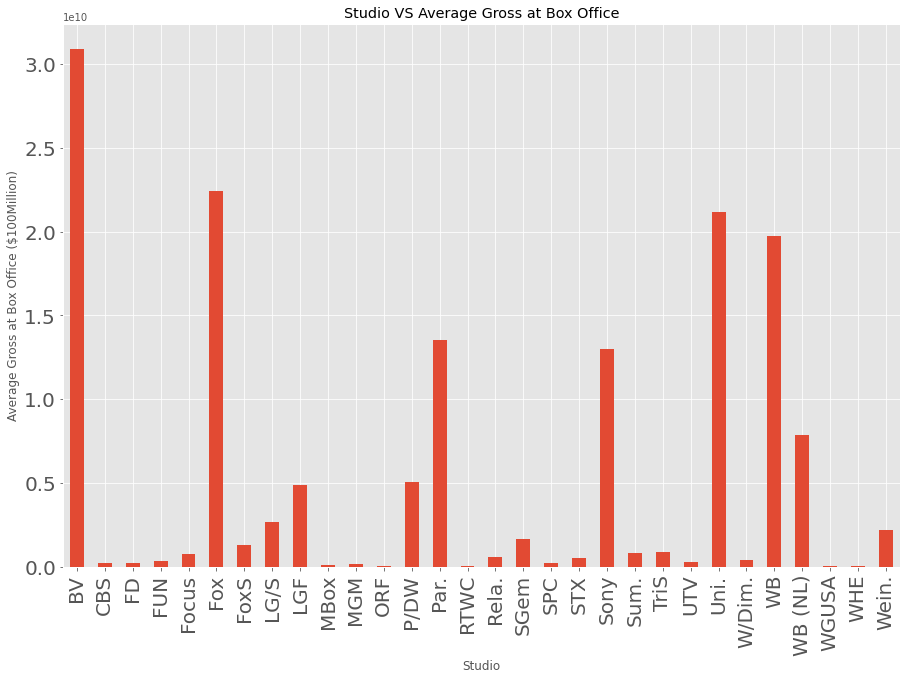

In [61]:
studio_gross.plot(figsize=(15,10),
                kind = 'bar',                
                fontsize = 20,
                title = "Studio VS Average Gross at Box Office",
                xlabel = 'Studio',
                ylabel = 'Average Gross at Box Office ($100Million)')

In [62]:
# Getting the mean average rating for each of the studios
studio_mean = total_comb.groupby('studio')['averagerating'].mean()
studio_mean

studio
BV         7.203922
CBS        6.500000
FD         6.700000
FUN        8.400000
Focus      7.033333
Fox        6.765079
FoxS       7.671429
LG/S       6.853846
LGF        6.750000
MBox       7.800000
MGM        7.200000
ORF        8.100000
P/DW       6.855556
Par.       6.717500
RTWC       7.100000
Rela.      6.375000
SGem       6.144444
SPC        7.500000
STX        6.566667
Sony       6.348780
Sum.       6.250000
TriS       6.720000
UTV        8.500000
Uni.       6.541176
W/Dim.     6.266667
WB         6.815000
WB (NL)    6.595833
WGUSA      7.500000
WHE        6.800000
Wein.      7.681818
Name: averagerating, dtype: float64

C:\Users\scott\AppData\Local\Temp/ipykernel_19232/3948618848.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, fontsize=20, rotation = 90)


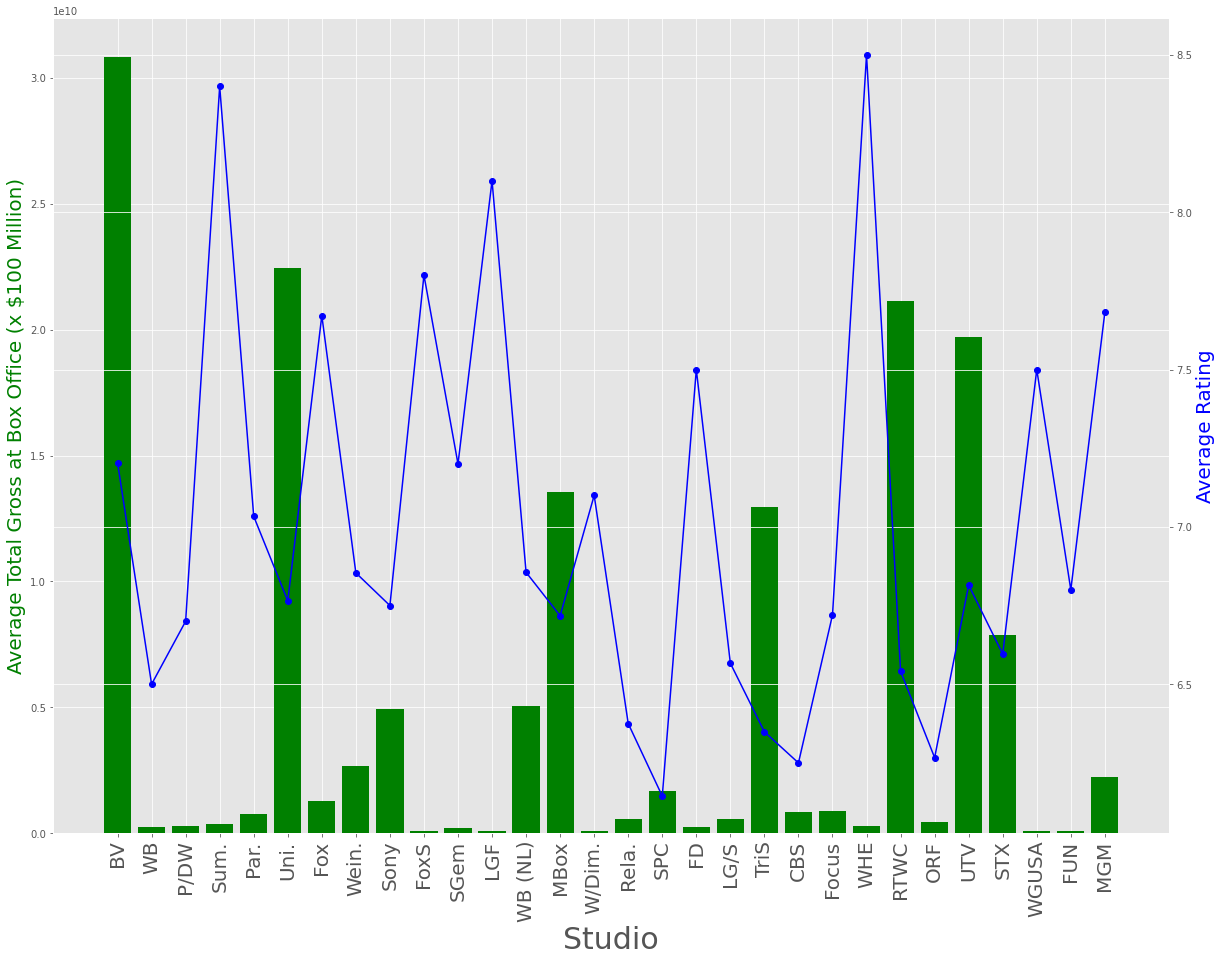

In [63]:
x = total_comb['studio'].unique()
y1 = studio_gross
y2 = studio_mean
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,15))
ax.bar(x, y1, color='green')
ax.set_xlabel("Studio", fontsize=30)
ax.set_xticklabels(x, fontsize=20, rotation = 90)
ax.set_ylabel("Average Total Gross at Box Office (x $100 Million)", color='green', fontsize=20)

ax2 = ax.twinx()
ax2.plot(x, y2, color='blue', marker='o')
ax2.set_ylabel("Average Rating", color='blue', fontsize=20)
plt.show()

<AxesSubplot:title={'center':'Studio VS Average Rating'}, xlabel='Studio', ylabel='Average Rating'>

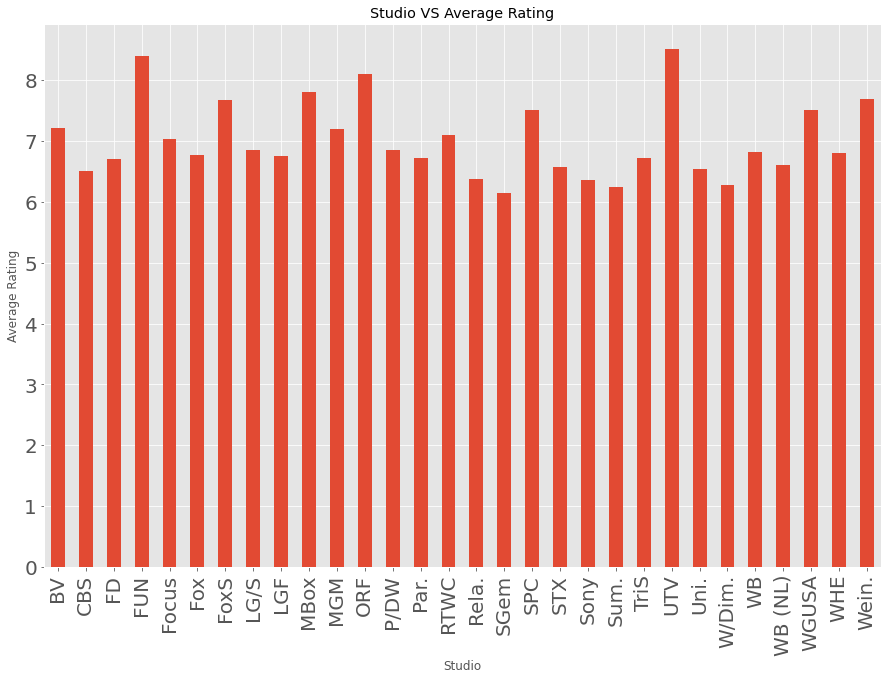

In [93]:
studio_mean.plot(figsize=(15,10),
                kind = 'bar',                
                fontsize = 20,
                title = "Studio VS Average Rating",
                xlabel = 'Studio',
                ylabel = 'Average Rating')

In [65]:
# Getting the mean rating of the primary genres
genre_mean = total_comb.groupby('primary_genre')['averagerating'].mean()
genre_mean

primary_genre
Action         6.703587
Adventure      6.862295
Animation      7.333333
Biography      7.612500
Comedy         6.401613
Crime          7.440000
Documentary    1.600000
Drama          6.925000
Fantasy        5.500000
Horror         6.430769
Mystery        7.500000
Romance        7.100000
Name: averagerating, dtype: float64

<AxesSubplot:title={'center':'Average Rating per Genre'}, xlabel='Genre', ylabel='Average Rating'>

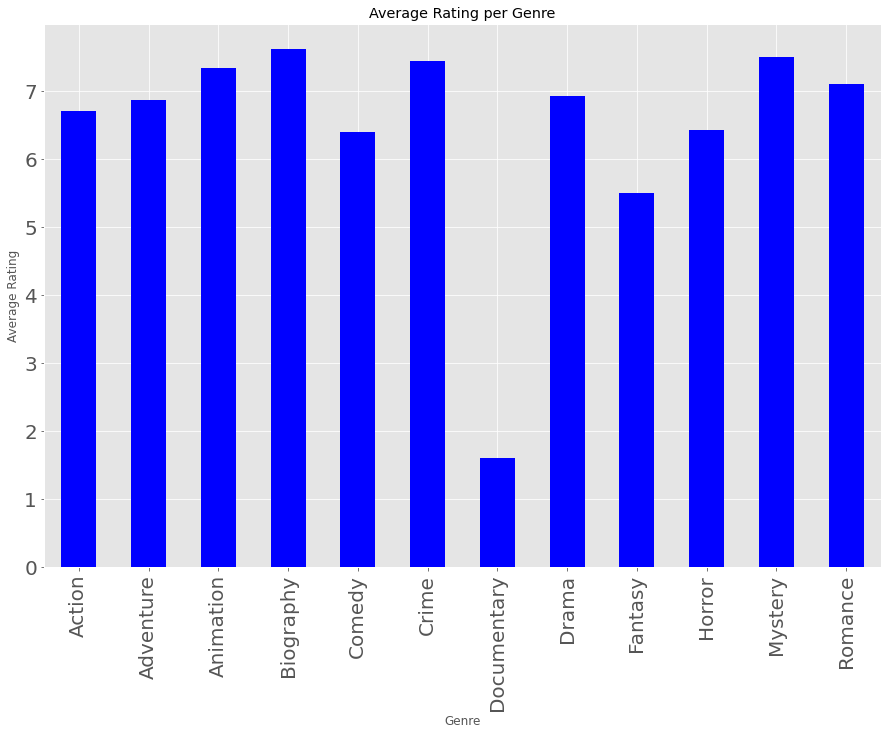

In [66]:
# Now to compare average rating vs genre
genre_mean.plot(figsize=(15,10),
                kind = 'bar',
                fontsize=20,
                color = 'blue',
                xlabel = "Genre",
                ylabel = "Average Rating",
                title = "Average Rating per Genre")

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

From ranking the top 10 movies by highest total gross we can see some similarities with the genres, with 9/10 had a primary genre listen as Action and their secondary genre also as Adventure.

We can also see that the studio 'BV' (Marvel Studios) made up 60% of the top 10.

These were almost all movies that were 2 hours or more.

However, we can also derive from the data that none of these movies were in the top 10 with user ratings, as the mean rating is 6.77.

In [67]:
top_10_gross

,title,studio,year,total_gross,runtime_minutes,averagerating,numvotes,primary_genre,sub_genre,other_genre
1601,Avengers: Age of Ultron,BV,2015,1405400000,141.0,7.3,665594,Action,Adventure,Sci-Fi
2720,Black Panther,BV,2018,1347000000,134.0,7.3,516148,Action,Adventure,Sci-Fi
2408,Star Wars: The Last Jedi,BV,2017,1332600000,152.0,7.1,462903,Action,Adventure,Fantasy
2721,Jurassic World: Fallen Kingdom,Uni.,2018,1309500000,128.0,6.2,219125,Action,Adventure,Sci-Fi
2722,Incredibles 2,BV,2018,1242800000,118.0,7.7,203510,Action,Adventure,Animation
942,Iron Man 3,BV,2013,1214800000,130.0,7.2,692794,Action,Adventure,Sci-Fi
1602,Minions,Uni.,2015,1159400000,91.0,6.4,193917,Adventure,Animation,Comedy
2011,Captain America: Civil War,BV,2016,1153300000,147.0,7.8,583507,Action,Adventure,Sci-Fi
2723,Aquaman,WB,2018,1147800000,143.0,7.1,263328,Action,Adventure,Fantasy
240,Transformers: Dark of the Moon,P/DW,2011,1123800000,154.0,6.2,366409,Action,Adventure,Sci-Fi


In [68]:
top_10_ratings = total_comb.sort_values('averagerating', ascending=False).head(10)
top_10_ratings

,title,studio,year,total_gross,runtime_minutes,averagerating,numvotes,primary_genre,sub_genre,other_genre
1,Inception,WB,2010,828300000,148.0,8.8,1841066,Action,Adventure,Sci-Fi
1265,Interstellar,Par.,2014,677400000,169.0,8.6,1299334,Adventure,Drama,Sci-Fi
2036,Dangal,UTV,2016,302900000,161.0,8.5,123638,Action,Biography,Drama
2719,Avengers: Infinity War,BV,2018,678800000,149.0,8.5,670926,Action,Adventure,Sci-Fi
598,Django Unchained,Wein.,2012,425400000,165.0,8.4,1211405,Drama,Western,None
2433,Your Name.,FUN,2017,358000000,106.0,8.4,134084,Animation,Drama,Fantasy
2419,Coco,BV,2017,807100000,105.0,8.4,277194,Adventure,Animation,Comedy
588,The Dark Knight Rises,WB,2012,1084900000,164.0,8.4,1387769,Action,Thriller,None
2745,Green Book,Uni.,2018,319800000,130.0,8.3,204972,Biography,Comedy,Drama
0,Toy Story 3,BV,2010,1067000000,103.0,8.3,682218,Adventure,Animation,Comedy


***
The graph of genres represented a significant alignment with our top grossing movies seen above. The clear top 2 genres were action and adventure with comedy and drama a long way back but considerably more occurances than the rest of the field of genres. 

This would indicate that these fields are the best place to direct Microsoft towards.

![top_10_gross](images/top_ten_gross.jpg)

![count_of_genres](images/count_of_genre.png)

The graph of number of votes vs the average rating showed a correlation between the higher number of votes representing a higher average rating. So people that took the time to leave a review were typically satisfied more so with the movie than those movies with less reviews.

![votes_vs_rating](images/votes_vs_rating.jpg)

## Conclusions
This analysis leads to recomendations for Microsoft to utilise in the implemenation of their new movie studio:

* Prioritise the creation of Action and Adventure movies as these have the highest gross and also occur the most in movies that have above average gross and average reviews.

* Movies must last for at least 100 minutes. This is seen from the top 10 grossing movies and the top 10 rated movies.

***

This analysis did not display any standout features that would provide certainty to success of a movie. This is due to the movies being applicable to such a wide audience that satisfying all viewers is not possible.

That being said if it was possible to retrieve additional data regarding the cost of creating the movies, this may change the direction of movie genre as typically action and adventure movies are more likley to have a higher cost of creation, which detracts from looking for the highest grossing movies as a preference.

***